## 사이킷런으로 수행하는 타이타닉 생존자 예측

* 캐글에서 제공하는 타이타닉 탑승자 데이터 

* 캐글 : 데이터 분석 오픈 포탈
    - 세계적인 ML 기반 분석 대회를 온라인 상에서 주관
    
캐글사이트 : https://www.kaggle.com/c/titanic/data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# InteractiveShell의 옵션을 지정하여 모두 출력되도록 할 수 있다

In [2]:
import warnings
warnings.filterwarnings(action='ignore') 

# 경고 메세지 무시

## 변수 별 정보

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [54]:
titanic_df = pd.read_csv('datasets/titanic/train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##  데이터 전처리 : 결측치 처리



In [69]:
# PassengerId	id
# Survived	생존 여부 (0 = 사망, 1 = 생존)
# Pclass	티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)
# name	이름
# Sex	성별
# Age	나이
# SibSp	함께 탑승한 자녀 , 배우자 의 수
# Parch	함께 탑승한 부모님 , 아이들 의 수
# Fare	요금
# Ticket	티켓 번호
# Cabin	수하물 번호
# Embarked	선착장

In [70]:
# 데이터 칼럼 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
titanic_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [72]:
titanic_df['Age'].mean()

29.69911764705882

In [73]:
titanic_df['Age'].min()

0.42

In [74]:
titanic_df['Age'].max()

80.0

In [75]:
# 변수들의 기술통계량
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
titanic_df.describe(include=['O'])

# 숫자가 아닌 기능에 대한 개수, 빈도, 고유성 등의 통계를 출력으로 제공 , 'O' = object

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Glynn, Miss. Mary Agatha",male,347082,B96 B98,S
freq,1,577,7,4,644


## 결측치 파악

- isnull() 메서드

In [77]:
# Null 값 개수 확인
titanic_df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [78]:
titanic_df['Age'].isnull().sum()

177

In [79]:
titanic_df['Cabin'].isnull().sum()

687

In [80]:
titanic_df['Embarked'].isnull().sum()

2

In [81]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [82]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##  데이터 전처리 : 결측치 처리

### 결측치 발생 원인
* 미응답, 다른 변수나 문항의 응답 여부에 의존적인 경우
* 기록 누락
* 수집시 오류

### 결측치 처리 방법
* 완전제거
* 평균값 대체: 전체 평균 또는 기준 속성의 평균
    - 응답률이 높은 집단의 값이 평균에 큰 영향을 미치므로 사용에 주의
    - 관측값에서 계산한 평균값을 이욯아므로 표준오차 과소추정 발생
* 핫덱(hot-decx) 대체: 동일한 조사에서 다른 관측값으로부터 얻은 자료로 대체
    - 결측치와 비슷한 특성을 가진 것을 골라서 무작위 추출하여 대체

### NULL 컬럼들에 대한 처리

- 사이킷 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 Null 값을 어떻게 처리할지 결정
- DataFrame()의 fillna() 메서드를 사용해서 Null 값을 평균 또는 고정 값으로 변경
- Age: 평균 나이로 변경
- 나머지 칼럼: 'N'으로 변경

### NULL 컬럼들에 대한 처리

- DataFrame()의 fillna() 메서드를 사용 

In [83]:
# Null 처리
# inplace=True -> 바로 적용

titanic_df['Age'].fillna(titanic_df['Age'].mean() , inplace=True)


In [84]:
titanic_df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [85]:
titanic_df['Cabin'].fillna('N' , inplace=True)

In [86]:
titanic_df['Cabin'].isnull().sum()

0

In [87]:
titanic_df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [88]:
titanic_df['Embarked'].fillna('N' , inplace=True)

In [89]:
titanic_df['Embarked'].isnull().sum()

0

In [90]:
# 모든 칼럼의 Null 값을 합산해서 Null 값이 없는지 확인
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 문자열 변수(피처) 빈도 분포 확인 : value_counts()

In [91]:
# 문자열 피처 (Sex, Cabin , Embarked )값 분류 확인
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [92]:
titanic_df['Cabin'].value_counts()

N              687
B96 B98          4
C23 C25 C27      4
G6               4
D                3
              ... 
D50              1
A6               1
D7               1
A32              1
B69              1
Name: Cabin, Length: 148, dtype: int64

In [93]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [96]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [97]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### 문자열 변수 Cabin값 변경

In [98]:
# Cabin 칼럼 값 중에서 첫번째 문자만 추출
titanic_df['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [99]:
# Cabin 값을 선실등급만으로 표기 (선실 번호 제외)
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

In [100]:
# 선실등급 별 개수 확인
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

## 성별에 따른 생존자수 분포(EDA)

머신러닝 알고리즘 적용해서 예측 수행 전에 데이터 탐색
- 어떤 유형의 승객이 생존 확률이 높았는지 확인
- 성별이 생존 확률에 어떤 영향을 미쳤는지 확인
- 성별에 따른 생존자 수 비교

In [101]:
# 성별 (Sex) 분포 확인

titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [107]:
titanic_df.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

In [110]:
titanic_df.groupby(['Sex' , 'Pclass'])['Pclass'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Pclass, dtype: int64

In [112]:
# 생존(Survived) 분포 확인
titanic_df.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [118]:
# 성별(Sex) * 생존(Survived) 확인
# 사망 : 0
# 생존 : 1
# Survived 칼럼 : 레이블로 결정 클래스 값

titanic_df.groupby('Sex')['Survived'].value_counts()



Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [122]:
titanic_df.groupby(['Sex' , 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [124]:
titanic_df.groupby(['Survived' , 'Sex'])['Sex'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64

In [126]:
titanic_df.groupby(['Pclass' , 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [128]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

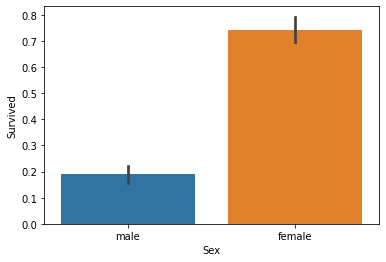

In [130]:
# 성별 생존자 : 막대 그래프 (barplot)
sns.barplot(x='Sex'  , y='Survived' , data=titanic_df)

<BarContainer object of 2 artists>

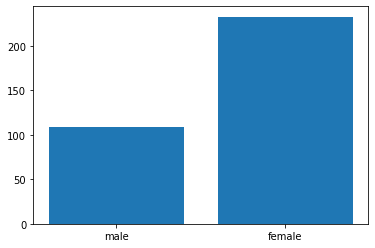

In [149]:
# plt.figure(figsize=(10,10))
# value = titanic_df['Survived']
# label = titanic_df['Sex']
# plt.bar(label , value)
# plt.show()

x=['male','female']
y = [titanic_df.groupby(['Sex','Survived'])['Survived'].count()[3],titanic_df.groupby(['Sex','Survived'])['Survived'].count()[1]]
plt.bar(x,y)


In [167]:


# matplot으로 그리는거
# https://kimdingko-world.tistory.com/169
ratio = titanic_df.loc[titanic_df['Survived']==1].Sex.value_counts()
labels = titanic_df.loc[titanic_df['Survived']==1].Sex.unique()

plt.bar(ratio , labels=labels , 


SyntaxError: unexpected EOF while parsing (<ipython-input-167-f6f62e3f0e02>, line 6)

<AxesSubplot:xlabel='Survived', ylabel='count'>

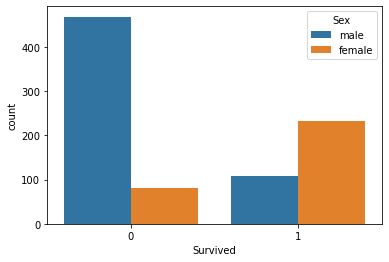

In [169]:
sns.countplot(x='Survived'  , hue='Sex' , data=titanic_df) 

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

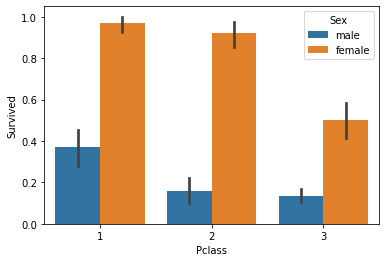

In [148]:
# 객실 등급별/성별 생존 확률

# hue : sns에서 범주형으로 나눠줌
sns.barplot(x='Pclass'  , y='Survived' , hue='Sex' , data=titanic_df) 

**참고: 오차막대(error bar)**

: 일반적으로 3가지 값을 많이 사용한다.

1. 표준편차(standard deviation, SD)
2. 표준오차 (standard error, SE)
3. 95% 신뢰구간 (95% confidence interval, CI)

## 데이터 전처리 : 구간화(binning)

### 연령대에 따른 생존자수 분포
- 연령은 수치형 변수이므로 범주형으로 구간화(binning)

In [159]:
# 입력 age에 따라 구분값을 반환하는 함수 설정

def get_category_age(age):
    result = ''
    if age<0:
        result = 'Unknown'
    elif age<=5:
        result = 'Baby'
    elif age<=12:
        result = 'Child'
    elif age<=18:
        result = 'Teenager'
    elif age<=25:
        result = 'Student'
    elif age<=35:
        result = 'Young Adult'
    elif age<=60:
        result = 'Adult'
    else:
        result = 'Elderly'
    return result

In [160]:
get_category_age(5)

'Baby'

In [161]:
get_category_age(-1)

'Unknown'

In [162]:
get_category_age(50)

'Adult'

In [164]:
# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 칼럼값을 받아서 해당하는 category 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category_age(x))

In [206]:
titanic_df['Age_cat'].value_counts()

KeyError: 'Age_cat'

In [207]:
group_names = ['Unknown' , 'Baby' , 'Child' , 'Teenager' , 'Student' , 'Young Adult' , 'Adult', 'Elderly']

In [208]:
sns.barplot(x='Age_cat'  , y='Survived' , hue='Sex' , data=titanic_df , order=group_names) 

ValueError: Could not interpret input 'Age_cat'

## 데이터 전처리 : 인코딩

In [175]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Age_cat      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


### 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환

- 인코딩 : 사이킷런의 LabelEncoder 클래스 이용해서 레이블 인코딩 적용
- 0~(카테고리 유형수-1) 숫자 값으로 변환
- fit() / transform() 메서드 사용

In [209]:
from sklearn.preprocessing import LabelEncoder

labels = []
features = ['Sex', 'Cabin', 'Embarked']
for feature in features:
    encoder = LabelEncoder()
    titanic_df[feature] = encoder.fit_transform(titanic_df[feature])
    

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,147,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,30,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,147,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,60,0


In [202]:
# 레이블 인코딩처리 함수 정의 encode_features(df)
from sklearn.preprocessing import LabelEncoder

features = ['Sex' , 'Cabin' , 'Embarked' ]

for feature in features:
    # 인코더 객체 생성
    le = LabelEncoder()
    le.fit(titanic_df[feature])
    titanic_df[feature] = le.transform(titanic_df[feature])
    
    # 인코딩 : fit , transform()
    
titanic_df.head()

LabelEncoder()

LabelEncoder()

LabelEncoder()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


## 데이터 전처리 : 삭제

- PassengerId , Name , Ticket 변수 삭제
- drop(labels=None, axis=0 , inplace=False) 함수 사용

In [185]:
# 불필요한 변수 제거 drop() 함수 : PassengerId , Name ,Ticket 변수

titanic_df.drop(['PassengerId' , 'Name' , 'Ticket'] , inplace=True , axis=1)

# axis=1 : 열방향



KeyError: "['PassengerId' 'Name' 'Ticket'] not found in axis"

In [187]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_cat
0,0,3,1,22.000000,1,0,7.2500,7,3,Student
1,1,1,0,38.000000,1,0,71.2833,2,0,Adult
2,1,3,0,26.000000,0,0,7.9250,7,3,Young Adult
3,1,1,0,35.000000,1,0,53.1000,2,3,Young Adult
4,0,3,1,35.000000,0,0,8.0500,7,3,Young Adult
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3,Young Adult
887,1,1,0,19.000000,0,0,30.0000,1,3,Student
888,0,3,0,29.699118,1,2,23.4500,7,3,Young Adult
889,1,1,1,26.000000,0,0,30.0000,2,0,Young Adult


In [188]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    int64  
 9   Age_cat   891 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 69.7+ KB


---

###### 지금 까지 가공한내용을  정리하고 함수로 작성 (재사용 가능) #######

In [222]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    # Age , Cabin , Embarked
    df['Age'].fillna(df['Age'].mean() , inplace=True)
    df['Cabin'].fillna('N' , inplace=True)
    df['Embarked'].fillna('N' , inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    # PassengerId , Name, Ticket 제거
    df.drop(['PassengerId' , 'Name' , 'Ticket'], axis=1 , inplace=True)
    return df
   

# 레이블 인코딩 수행 
def format_features(df):
    # Cabin의 첫 문자 추출
    df['Cabin'] = df['Cabin'].str[:1]
    # Cabin , Sex , Embarked를 LabelEncoding
    features = ['Cabin' , 'Sex' , 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df



# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_dataFrame(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

---

## 생존자 예측 프로세스

### 1단계. 데이터 로딩
- 피처 데이터셋, 레이블 데이터셋 추출

In [223]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('datasets/titanic/train.csv')
y_train = titanic_df['Survived']
x_train = titanic_df.drop(columns=['Survived'])
# Target dataset

# Input dataset : 'Survived' 칼럼 제외


### 2단계. 데이터 전처리
- 피처 데이터 세트에 transform_features()를 적용해 데이터 가공

In [224]:
# 데이터 전처리 함수 호출
x_train = transform_dataFrame(x_train)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [221]:
# 생존자 예측을 수행할 피처 데이터 세트 완성
print(x_train.info())
print(x_train.describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int32  
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 45.4 KB
None
<bound method NDFrame.describe of      Pclass  Sex        Age  SibSp  Parch     Fare  Cabin  Embarked
0         3    1  22.000000      1      0   7.2500    146         3
1         1    0  38.000000      1      0  71.2833     81         0
2         3    0  26.000000      0      0   7.9250    146         3
3         1    0  35.000000      1      0  53.1000     55         3
4         3    1  35.000000      0      0   8.0500    146         

### 3단계. Data Split : 학습 데이터/테스트 데이터

In [217]:
# 학습 / 테스트 데이터 세트 분리
# 테스트 데이터 세트 : 20%
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x_train , y_train , test_size=0.2 , random_state=11)

### 4단계. 분류 알고리즘을 적용한 학습/예측/평가

* 3개의 ML 알고리즘 수행  
     - 결정 트리, 랜덤 포레스트, 로지스틱 회귀(분류)
* 이 3개의 알고리즘으로 예측 수행하고 
* 교차 검증으로 평가

사이킷런 클래스
* 결정 트리 : DecisionTreeClassifier
* 랜덤 포레스트 : RandomForestClassifier
* 로지스틱 회귀 : LogisticRegression
    
train_test_split()으로 분리한 학습 데이터와 테스트 데이터를 기반으로
* 머신러닝 모델을 학습하고(fit), 예측 수행(predict)
* 예측 성능 평가 :  정확도 (accuracy_score() 사용)

In [227]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , Y_train)
pred = dt_clf.predict(X_test)
print(f'결정트리 정확도 : {accuracy_score(Y_test , pred)}')

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , Y_train)
pred = rf_clf.predict(X_test)
print(f'랜덤 포레스트 정확도 : {accuracy_score(Y_test , pred)}')

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , Y_train)
pred = lr_clf.predict(X_test)
print(f'로지스틱 회귀 정확도 : {accuracy_score(Y_test , pred)}')

# 로지스틱 회귀 : 로지스틱 회귀는 종속변수가 이항형 문제(즉, 유효한 범주의 개수가 두개인 경우)를 지칭할 때 사용된다. 

DecisionTreeClassifier(random_state=11)

결정트리 정확도 : 0.7988826815642458


RandomForestClassifier(random_state=11)

랜덤 포레스트 정확도 : 0.8435754189944135


LogisticRegression()

로지스틱 회귀 정확도 : 0.8491620111731844


### 5단계. 교차 검증을 통한 모델 성능 향상
: 결정 트리 모델 좀 더 평가
* 사이킷런 model_selection 패키지의 
    - KFold 클래스, cross_val_score(), GridSearchCV 클래스 사용

In [249]:
# 결정 트리 모델에 대해 KFold 클래스를 이용해 교차 검증 수행 
# 폴드 개수 : 5
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier




def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds )
    scores = []
    i = 1
    
    for train_idx , test_idx in kfold.split(x_train):
        X_train , X_test = x_train.values[train_idx] , x_train.values[test_idx]
        Y_train , Y_test = y_train.values[train_idx] , y_train.values[test_idx]
        
        # 학습
        clf.fit(X_train , Y_train)
        
        # 예측
        pred = dt_clf.predict(X_test)
        
        # 평가
        acc = np.round(accuracy_score(Y_test , pred),3)
        scores.append(acc)
        
        print(f'교차검증 {i} : 정확도 {acc}')
        i+=1
        
    print(np.mean(scores))
    

dt_clf = DecisionTreeClassifier()
exec_kfold(dt_clf)


교차검증 1 : 정확도 0.76
교차검증 2 : 정확도 0.781
교차검증 3 : 정확도 0.798
교차검증 4 : 정확도 0.77
교차검증 5 : 정확도 0.82
0.7857999999999999


In [251]:
# exec_kfold 호출
exec_kfold(dt_clf)

교차검증 1 : 정확도 0.76
교차검증 2 : 정확도 0.758
교차검증 3 : 정확도 0.792
교차검증 4 : 정확도 0.77
교차검증 5 : 정확도 0.815
0.779


In [253]:
exec_kfold(dt_clf, 10)

교차검증 1 : 정확도 0.756
교차검증 2 : 정확도 0.742
교차검증 3 : 정확도 0.742
교차검증 4 : 정확도 0.753
교차검증 5 : 정확도 0.809
교차검증 6 : 정확도 0.831
교차검증 7 : 정확도 0.809
교차검증 8 : 정확도 0.753
교차검증 9 : 정확도 0.865
교차검증 10 : 정확도 0.854
0.7914000000000001


In [255]:
exec_kfold(lr_clf)

교차검증 1 : 정확도 0.989
교차검증 2 : 정확도 0.966
교차검증 3 : 정확도 0.994
교차검증 4 : 정확도 0.994
교차검증 5 : 정확도 0.927
0.9739999999999999


In [256]:
exec_kfold(rf_clf)

교차검증 1 : 정확도 0.989
교차검증 2 : 정확도 0.966
교차검증 3 : 정확도 0.994
교차검증 4 : 정확도 0.994
교차검증 5 : 정확도 0.927
0.9739999999999999


In [ ]:
######### 참고: 피처 데이터 세트 확인 
# X_titanic_df와 X_titanic_df.values[train_index]


In [ ]:
######### 참고: index 값 출력


In [ ]:
######### 참고 : train_index, test_index 확인 #####



- KFold 교차 검증 수행에서 enumerate() 사용하지 않을 경우

In [ ]:
################### 참고 ##################################
# 앞의  Model Selection 모듈 소개에서 한 것처럼 enumerate() 사용하지 않을 경우
# n_iter 변수를 추가하여 반복횟수 값 저장하여 이용

    
# exec_kfold 호출



- cross_val_score()를 이용해 교차 검증 수행

In [260]:
# cross_val_score()를 이용해 교차 검증 수행
from sklearn.model_selection import cross_val_score

# cross_val_score(estimator, data, label, 폴드 수)
scores = cross_val_score(dt_clf , x_train , y_train , cv=5)

for i, acc in enumerate(scores):
    print(f'교차검증 {i} : 정확도 {acc}')
print(f'평균 정확도 {np.mean(scores)}')



교차검증 0 : 정확도 0.7486033519553073
교차검증 1 : 정확도 0.7752808988764045
교차검증 2 : 정확도 0.797752808988764
교차검증 3 : 정확도 0.7921348314606742
교차검증 4 : 정확도 0.8314606741573034
평균 정확도 0.7890465130876907


### 6단계. 하이퍼파라미터 튜닝

- GridSearchCV 클래스를 이용해 하이퍼 파리미터를 튜닝

In [262]:
# GridSearchCV 클래스를 이용해 하이퍼 파리미터를 튜닝
from sklearn.model_selection import GridSearchCV
# DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능 측정
# CV : 5개의 폴드 세트 지정
# 하이퍼 파라미터 : max_depth, min_samples_split, min_samples_leaf 

params = {'max_depth' :[2,3,5,10] , 'min_samples_leaf':[2,3,5] ,
         'min_samples_split' : [2,3,5]}

grid_clf = GridSearchCV(dt_clf , param_grid=params , scoring='accuracy' , cv=5)

grid_clf.fit(x_train , y_train)
grid_clf.best_params_


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5}

In [264]:
grid_clf.best_score_

0.8170422446801833

In [267]:
best_clf = grid_clf.best_estimator_

In [268]:
# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
pred = best_clf.predict(X_test)
accuracy_score(Y_test , pred)

0.8715083798882681